In [1]:
import numpy as np 
import pandas as pd
import os

import re
import nltk 
import spacy 
import string 
import email
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def get_raw_text(emails):
    email_text = []
    for email in emails.walk():
        if email.get_content_type() == 'text/plain':
            email_text.append(email.get_payload())
    return ''.join(email_text)

def clean_column(data):
    if data is not None:
        stopwords_list = stopwords.words('english')
        #exclusions = ['RE:', 'Re:', 're:']
        #exclusions = '|'.join(exclusions)
        data =  data.lower()
        data = re.sub('re:', '', data)
        data = re.sub('-', '', data)
        data = re.sub('_', '', data)
        # Remove data between square brackets
        data =re.sub('\[[^]]*\]', '', data)
        # removes punctuation
        data = re.sub(r'[^\w\s]','',data)
        data = re.sub(r'\n',' ',data)
        data = re.sub(r'[0-9]+','',data)
        # strip html 
        p = re.compile(r'<.*?>')
        data = re.sub(r"\'ve", " have ", data)
        data = re.sub(r"can't", "cannot ", data)
        data = re.sub(r"n't", " not ", data)
        data = re.sub(r"I'm", "I am", data)
        data = re.sub(r" m ", " am ", data)
        data = re.sub(r"\'re", " are ", data)
        data = re.sub(r"\'d", " would ", data)
        data = re.sub(r"\'ll", " will ", data)
        data = re.sub('forwarded by phillip k allenhouect on    pm', '',data)
        data = re.sub(r"httpitcappscorpenroncomsrrsauthemaillinkaspidpage", "", data)
        
        data = p.sub('', data)
        if 'forwarded by:' in data:
            data = data.split('subject')[1]
        data = data.strip()
        return data
    return 'No Subject'


In [3]:
dirname = "../data"
filename = "emails.csv"

In [4]:
e_namefile = os.path.join(dirname, filename)

In [5]:
e_namefile

'../data/emails.csv'

In [6]:
e_namefile = os.path.join(dirname, filename)
enron = pd.read_csv(e_namefile, nrows=5000)
emails = list(map(email.parser.Parser().parsestr,enron['message']))
headings  = emails[0].keys()

In [7]:
for key in headings:
    enron[key] = [doc[key] for doc in emails]
    
enron['body'] = list(map(get_raw_text, emails))
enron['Subject_new'] = enron['Subject'].apply(clean_column)
enron['body_new'] = enron['body'].apply(clean_column)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

In [8]:
enron

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,Subject_new,body_new
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,,here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,,traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,test,test successful way to go
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",,randy can you send me a schedule of the sala...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,hello,lets shoot for tuesday at
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,arnold-j/deleted_items/135.,Message-ID: <1618629.1075852693101.JavaMail.ev...,<1618629.1075852693101.JavaMail.evans@thyme>,"Tue, 9 Oct 2001 14:50:14 -0700 (PDT)",m..schmidt@enron.com,None,Enron Mentions,1.0,text/plain; charset=ANSI_X3.4-1968,quoted-printable,"Schmidt, Ann M. </O=ENRON/OU=NA/CN=RECIPIENTS/...",,,,"\JARNOLD (Non-Privileged)\Arnold, John\Deleted...",Arnold-J,JARNOLD (Non-Privileged).pst,STOCKWATCH Enron higher after Merrill Lynch's ...,enron mentions,stockwatch enron higher after merrill lynchs c...
4996,arnold-j/deleted_items/136.,Message-ID: <25218462.1075852693367.JavaMail.e...,<25218462.1075852693367.JavaMail.evans@thyme>,"Tue, 9 Oct 2001 10:46:00 -0700 (PDT)",caroline.abramo@enron.com,john.arnold@enron.com,RE: Back office issues,1.0,text/plain; charset=us-ascii,7bit,"Abramo, Caroline </O=ENRON/OU=NA/CN=RECIPIENTS...","Arnold, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",,,"\JARNOLD (Non-Privileged)\Arnold, John\Deleted...",Arnold-J,JARNOLD (Non-Privileged).pst,WE ARE HAVING A MEETING WITH FRED AND MICHELLE...,back office issues,we are having a meeting with fred and michelle...
4997,arnold-j/deleted_items/137.,Message-ID: <20671206.1075852693390.JavaMail.e...,<20671206.1075852693390.JavaMail.evans@thyme>,"Tue, 9 Oct 2001 07:23:43 -0700 (PDT)",scott.tanner@truequote.com,john.arnold@enron.com,APB,1.0,text/plain; charset=us-ascii,7bit,Scott Tanner <scott.tanner@truequote.com>@ENRON,john.arnold@enron.com; <??Sjohn.arnold@enron.c...,,,"\JARNOLD (Non-Privileged)\Arnold, 

In [9]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [10]:
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [11]:
email  = "I would love to watch the magic show again"
email2 = "What the hell they have made. Pathetic!"
email3 = " I do not know what to do"  
print (sentiment_analyzer_score(email))
print (sentiment_analyzer_score(email2))
print (sentiment_analyzer_score(email3))

I would love to watch the magic show again {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
None
What the hell they have made. Pathetic!- {'neg': 0.632, 'neu': 0.368, 'pos': 0.0, 'compound': -0.8622}
None
 I do not know what to do--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


In [12]:
sentiment_analyzer_score("You are cool")

You are cool---------------------------- {'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.3182}


In [13]:
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = enron['body_new'].apply(tokenizer.tokenize)
words_descriptions.head()

0                            [here, is, our, forecast]
1    [traveling, to, have, a, business, meeting, ta...
2                      [test, successful, way, to, go]
3    [randy, can, you, send, me, a, schedule, of, t...
4                      [lets, shoot, for, tuesday, at]
Name: body_new, dtype: object

In [14]:
enron

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,Subject_new,body_new
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,,here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,,traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,test,test successful way to go
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",,randy can you send me a schedule of the sala...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,hello,lets shoot for tuesday at
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,arnold-j/deleted_items/135.,Message-ID: <1618629.1075852693101.JavaMail.ev...,<1618629.1075852693101.JavaMail.evans@thyme>,"Tue, 9 Oct 2001 14:50:14 -0700 (PDT)",m..schmidt@enron.com,None,Enron Mentions,1.0,text/plain; charset=ANSI_X3.4-1968,quoted-printable,"Schmidt, Ann M. </O=ENRON/OU=NA/CN=RECIPIENTS/...",,,,"\JARNOLD (Non-Privileged)\Arnold, John\Deleted...",Arnold-J,JARNOLD (Non-Privileged).pst,STOCKWATCH Enron higher after Merrill Lynch's ...,enron mentions,stockwatch enron higher after merrill lynchs c...
4996,arnold-j/deleted_items/136.,Message-ID: <25218462.1075852693367.JavaMail.e...,<25218462.1075852693367.JavaMail.evans@thyme>,"Tue, 9 Oct 2001 10:46:00 -0700 (PDT)",caroline.abramo@enron.com,john.arnold@enron.com,RE: Back office issues,1.0,text/plain; charset=us-ascii,7bit,"Abramo, Caroline </O=ENRON/OU=NA/CN=RECIPIENTS...","Arnold, John </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...",,,"\JARNOLD (Non-Privileged)\Arnold, John\Deleted...",Arnold-J,JARNOLD (Non-Privileged).pst,WE ARE HAVING A MEETING WITH FRED AND MICHELLE...,back office issues,we are having a meeting with fred and michelle...
4997,arnold-j/deleted_items/137.,Message-ID: <20671206.1075852693390.JavaMail.e...,<20671206.1075852693390.JavaMail.evans@thyme>,"Tue, 9 Oct 2001 07:23:43 -0700 (PDT)",scott.tanner@truequote.com,john.arnold@enron.com,APB,1.0,text/plain; charset=us-ascii,7bit,Scott Tanner <scott.tanner@truequote.com>@ENRON,john.arnold@enron.com; <??Sjohn.arnold@enron.c...,,,"\JARNOLD (Non-Privileged)\Arnold, 

In [15]:
all_words = [word for tokens in words_descriptions for word in tokens]
enron['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

802809 words total, with a vocabulary size of 26084


In [16]:
enron['scores'] = enron['body_new'].apply(lambda review: analyser.polarity_scores(review))
enron.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,Subject_new,body_new,description_lengths,scores
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp..."
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp..."
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp..."


In [21]:
enron['compound']  = enron['scores'].apply(lambda score_dict: score_dict['compound'])

enron.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-bcc,X-Folder,X-Origin,X-FileName,body,Subject_new,body_new,description_lengths,scores,compound
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,,here is our forecast,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,,traveling to have a business meeting takes the...,139,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.9313
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,test,test successful way to go,5,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.5859
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",,randy can you send me a schedule of the sala...,34,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,hello,lets shoot for tuesday at,5,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.3400


In [40]:
enron['neg'] = enron['scores'].apply(lambda score_dict: score_dict['neg'])
enron['pos'] = enron['scores'].apply(lambda score_dict: score_dict['pos'])
enron['neu'] = enron['scores'].apply(lambda score_dict: score_dict['neu'])

In [22]:
enron['compound'].describe()

count    5000.000000
mean        0.508573
std         0.460153
min        -0.994900
25%         0.025800
50%         0.637600
75%         0.915225
max         1.000000
Name: compound, dtype: float64

In [27]:
from plotnine import *

In [30]:
fig = (
    ggplot(enron.dropna(subset = ['compound'])) +
    geom_histogram(aes(x='compound'))
)

/app/.venv/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


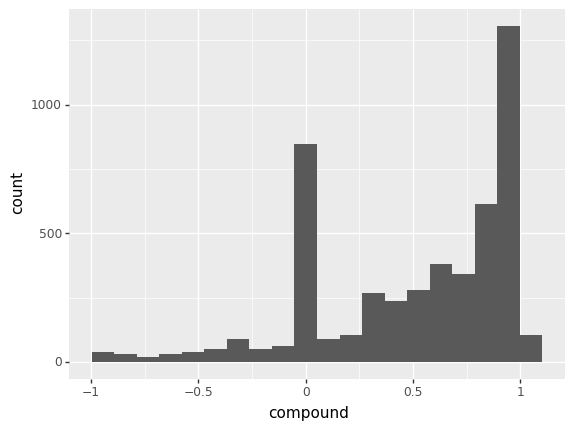

<ggplot: (8738482123105)>

In [31]:
fig

/app/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


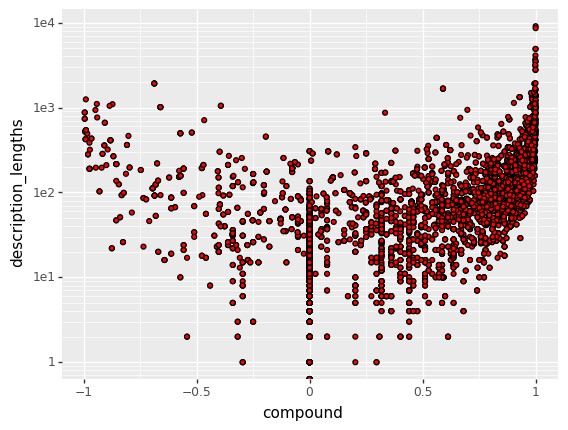

<ggplot: (8738475404876)>

In [37]:
fig = (
    ggplot(enron.dropna(subset = ['compound'])) +
    geom_point(
        aes( x = 'compound',
             y = 'description_lengths'),
        fill = 'red', color = 'black'
    ) +
    scale_y_log10()
)
fig

/app/.venv/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


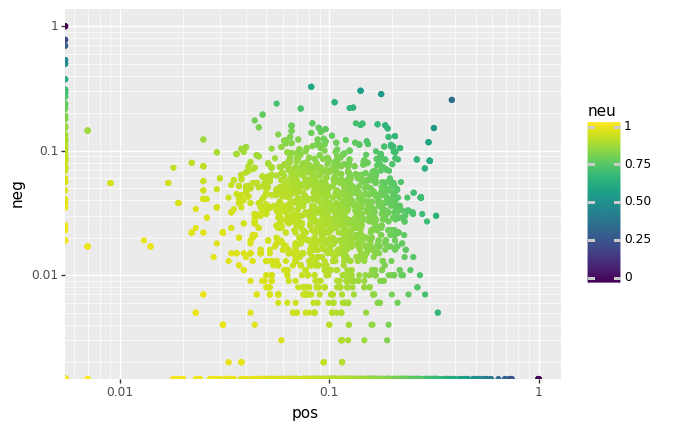

<ggplot: (8738475401400)>

In [56]:
fig = (
    ggplot(enron.dropna(subset = ['compound'])) +
    geom_point(
        aes( x = 'pos',
             y = 'neg',
            color = 'neu'#,
           # size = 'neu'
           )
    ) +
    scale_y_log10() +
    scale_x_log10()
)
fig